<a href="https://colab.research.google.com/github/MuhammadTalha-Ai/ML-Project/blob/main/Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn
!pip install nltk

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Text_Emotion.csv",encoding='utf-8')
data.head()

,text,emotion
0,carefully word blog posts amount criticism hea...,☹️
1,cannot remember little mermaid feeling carefre...,🙂
2,not feeling super well turns cold knocked next...,🙂
3,feel honored part group amazing talents,🙂
4,think helping also began feel pretty lonely lo...,☹️


In [ ]:
#data = data.drop([0,1,2])

In [ ]:
print(data.shape)

(282822, 2)


In [ ]:
data['text']=data['text'].astype(str)

In [ ]:
data.tail()

,text,emotion
282817,feel honored motivated share world life changi...,🙂
282818,feel like gloaty really delighted,🙂
282819,feel little energetic one day next several day...,🙂
282820,feel work experience fell although fantastic o...,🙂
282821,feel generous mood may give another fan fictio...,🙂


In [ ]:
data=data.dropna()

In [ ]:
data.head(10)

,text,emotion
0,carefully word blog posts amount criticism hea...,☹️
1,cannot remember little mermaid feeling carefre...,🙂
2,not feeling super well turns cold knocked next...,🙂
3,feel honored part group amazing talents,🙂
4,think helping also began feel pretty lonely lo...,☹️
5,feel like pleasant nice around,🙂
6,cannot get feelings not trusting head,🙂
7,still feeling exhausted know strength gotten day,☹️
8,not feeling particularly clever entertaining,🙂
9,feeling extremely ugly right,☹️


In [ ]:
data_sample = data.sample(n=15000, random_state=42)

In [ ]:
data_sample.shape

(15000, 2)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data_sample['text']=data_sample['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [ ]:
data_sample.head(10)

,text,emotion
227039,comfortable anywhere gaylandia antarctica jobs...,🙂
159592,hear galactic strongholds feel reason excited,🙂
169697,could help feeling disappointed end could trus...,☹️
220569,love feel like love world vain,☹️
143878,know feel proud making fill guiltiness sad fri...,🙂
214457,feel like lot complexity life makes unhappy ne...,☹️
117698,presume would feel gloomy,☹️
1328,feel like would smart make book stands alone p...,🙂
27923,id struggling feeling highly irritable toward ...,☹️
173682,would go yet another day feeling groggy sick s...,☹️


In [ ]:
import re
pattern = r'[0-9!?:;"(,)]'
data_sample['text']=data_sample['text'].apply (lambda x: re.sub(pattern,'',x))

In [ ]:
data_sample.head(10)

,text,emotion
227039,comfortable anywhere gaylandia antarctica jobs...,🙂
159592,hear galactic strongholds feel reason excited,🙂
169697,could help feeling disappointed end could trus...,☹️
220569,love feel like love world vain,☹️
143878,know feel proud making fill guiltiness sad fri...,🙂
214457,feel like lot complexity life makes unhappy ne...,☹️
117698,presume would feel gloomy,☹️
1328,feel like would smart make book stands alone p...,🙂
27923,id struggling feeling highly irritable toward ...,☹️
173682,would go yet another day feeling groggy sick s...,☹️


In [ ]:
categories = data_sample['emotion'].unique()
for category in categories:
  print(category)

🙂
☹️


In [ ]:
data_sample['emotion']=data_sample['emotion'].str.replace('emotion','')

In [ ]:
categories = data_sample['emotion'].unique()
for category in categories:
  print(category)

🙂
☹️


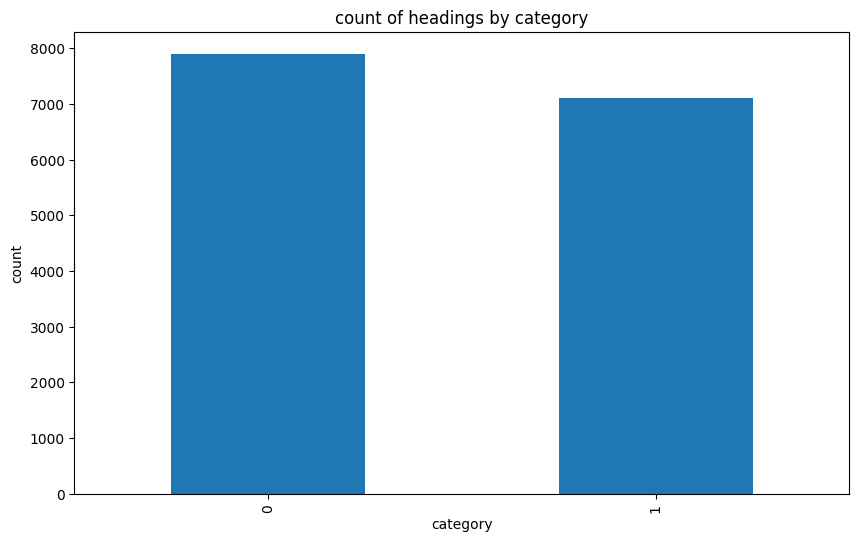

In [ ]:
import matplotlib.pyplot as plt
category_mapping= {'🙂':0,'☹️':1}
category_counts= data_sample['emotion'].map(category_mapping).value_counts()

plt.figure(figsize=(10,6))
category_counts.plot(kind='bar')
plt.xlabel('category')
plt.ylabel('count')
plt.title('count of headings by category')
plt.show()

In [ ]:
data_sample.head()

,text,emotion
227039,comfortable anywhere gaylandia antarctica jobs...,🙂
159592,hear galactic strongholds feel reason excited,🙂
169697,could help feeling disappointed end could trus...,☹️
220569,love feel like love world vain,☹️
143878,know feel proud making fill guiltiness sad fri...,🙂


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
x_tfidf=tfidf_vectorizer.fit_transform(data_sample['text'])
y= data_sample['emotion']

In [ ]:
print(x_tfidf)

  (0, 7209)	0.2999175482660502
  (0, 14993)	0.32244154750627113
  (0, 8113)	0.2999175482660502
  (0, 7247)	0.2093177387015083
  (0, 5161)	0.048160866966440515
  (0, 5804)	0.2227443635343445
  (0, 10502)	0.2867418533442492
  (0, 10702)	0.2430768406851717
  (0, 3314)	0.32244154750627113
  (0, 7479)	0.25289953681573824
  (0, 608)	0.32244154750627113
  (0, 5776)	0.32244154750627113
  (0, 647)	0.25696674593937957
  (0, 2707)	0.1928184657799844
  (1, 4872)	0.32713571703125366
  (1, 11326)	0.3510423355289821
  (1, 13497)	0.5631795273413662
  (1, 5726)	0.5631795273413662
  (1, 6400)	0.3582363236653834
  (1, 5161)	0.08411823632617589
  (2, 3299)	0.3524077095997219
  (2, 7115)	0.22664977821484927
  (2, 11953)	0.3524077095997219
  (2, 9953)	0.3524077095997219
  (2, 1023)	0.1638834415205323
  :	:
  (14997, 5161)	0.05581421943615856
  (14998, 6686)	0.37165344286897417
  (14998, 7386)	0.37165344286897417
  (14998, 733)	0.3068451542043267
  (14998, 6076)	0.22877657625589384
  (14998, 11801)	0.5040836

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(x_tfidf,y,test_size=0.2, random_state=42)
classifeir = LogisticRegression()
classifeir.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = classifeir.predict(x_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

          ☹️       0.96      0.91      0.93      1422
           🙂       0.92      0.96      0.94      1578

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000

